> **DO NOT EDIT IF INSIDE `computational_analysis_of_big_data_2017` folder** 

# Assignment 1

**Handin in Peergrade**: *Wednesday, November 8, 2017*<br>
**Peergrading deadline**: *Wednesday, November 15, 2017*<br>
**Peergrading feedback deadline**: *Sunday, November 19, 2017*

## Problems

> **Ex. 5.2.1**: Train a classifier on all of your data and test its accuracy.

>* If your affiliation matrix is `X_ta` and your target array is `y_ta` you can do this by instantiating a model like:
>
        from sklearn.naive_bayes import BernoulliNB
        model = BernoulliNB()
        model.fit(X_ta, y_ta)  # <--- This is the training/fitting/learning step
> The `BernoulliNB` is a version of the Naive Bayes classifier which associates certain features with labels and asks what the probability of a label for a data point is given its features. You are free to use any other classifier if you want. Popular ones are trees, random forests, support vector machines, feed forward neural networks, logistic regression, and the list goes on. With `sklearn`, they are just as easy to employ as the `BernoulliNB` classifier.


>1. Test the accuracy of your model. You can use the `.predict` method on the `model` object to get predictions for a matrix of data points. Report the accuracy of your model on the same data that you trained the model on, alongside the baseline accuracy of a "dumb" model that consequently guesses for the majority class.

>2. Report the precision, recall and F1 scores, with respect to the minority class (heroes). `sklearn` has implementations that you can use if you are short for time. Extra credit for doing it using only basic linear algebra operations with `numpy`, though.

>**IMPORTANT**: For consistency and to simplify the peer evaluation session, you should use my team affiliation data. Inside the `data` folder is a file called `data_511.csv` which you should use. Correct the directory path string and run the code snippet below to load the necessary variables

In [2]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

dat = pd.read_csv("data_511.csv", index_col=0)

x_ta = np.array(dat)[:, :-1]
y_ta = np.array(dat)[:, -1]

model = BernoulliNB()
model.fit(x_ta, y_ta)

prediction = model.predict(x_ta)

char_names = list(dat.index)
team_names = list(dat.columns)

print "Accuracy score:  " + str(metrics.accuracy_score(y_ta, prediction))
print "Precision score: " + str(metrics.precision_score(y_ta, prediction))
print "Recall score:    " + str(metrics.recall_score(y_ta, prediction))
print "F1 score:        " + str(metrics.f1_score(y_ta, prediction))

from sklearn.dummy import DummyClassifier




Accuracy score:  0.916155419223
Precision score: 0.888307155323
Recall score:    0.965844402277
F1 score:        0.925454545455


> **Ex. 5.3.1**: Investigate how well your model generalizes. You may have noticed that the performance seemed a little too good to be true in Ex 5.2.1.
1. Why did you get such a high accuracy in the previous exercise?
2. Split your data into a test and training set of equal size. Train the model only on the test set and report its accuracy and F1 scores on the training and test sets.
3. Comment on the difference you observe.

1. We had such a high accuracy in the previous exercise because we were testing our model on the same data with which we trained it.

In [4]:
# 2.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_ta, y_ta, test_size=0.5)
model.fit(x_train, y_train)
test_prediction = model.predict(x_test)
train_prediction = model.predict(x_train)

print "Test set accuracy score:     " + str(metrics.accuracy_score(y_test, test_prediction))
print "Test set F1 score:           " + str(metrics.f1_score(y_test, test_prediction))
print "Training set accuracy score: " + str(metrics.accuracy_score(y_train, train_prediction))
print "Training set F1 score:       " + str(metrics.f1_score(y_train, train_prediction))


Test set accuracy score:     0.81799591002
Test set F1 score:           0.850921273032
Training set accuracy score: 0.895705521472
Training set F1 score:       0.910369068541


3 . When the data is split, the model is less accurate on the test set because the test data is separate from the training data. The model is more accurate on the training set because it *is* the training data.

>**Ex. 6.1.1**: Apply a PCA to your data. If `X` is your feature matrix, a PCA can be done like:

>        pca = sklearn.decomposition.PCA()
>        pca.fit(X)
>        X_pca = pca.transform(X)

>1. What is the dimensionality of `X_pca` compared to `X`? What happened to `X` when you transformed it?
2. Plot the first two components/columns of the transformed data and color the points by their class label. My plot looks [like this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_6.1.1.2.png). Comment on the result. What would plotting two other components against each other show you?
3. Plot the explained variance ratio of each component. What does this tell you about the dataset? My plot looks [like this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_6.1.1.3.png).

>*Hint for 2: `plt.scatter` takes an argument `color` which must receive either a string such as `red` or `blue`, or a list of rgb values or strings such as `['red', 'blue', 'blue', ...]`.*

1. The dimensionality of X and X_pca is the same. Transforming X resulted in changing all of its values into numbers between 0 and 1 in X_pca, relating to their initial values in X. Thus it lowers the dimensionality of X.

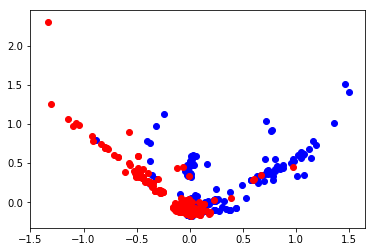

In [5]:
import sklearn.decomposition
from matplotlib import pyplot as plt


# 2.
X = x_ta
target_array = y_ta

# Perform principal component analysis on the dataset
pca = sklearn.decomposition.PCA()
pca.fit(X)
X_pca = pca.transform(X)

# create lists to plot the pca data separated by heroes and villains
h_c1 = [X_pca[i][0] for i in range(len(target_array)) if target_array[i] == 0]
v_c1 = [X_pca[i][0] for i in range(len(target_array)) if target_array[i] == 1]
h_c2 = [X_pca[i][1] for i in range(len(target_array)) if target_array[i] == 0]
v_c2 = [X_pca[i][1] for i in range(len(target_array)) if target_array[i] == 1]

plt.scatter(h_c1, h_c2, c=['b'])
plt.scatter(v_c1, v_c2, c=['r'])
plt.show()

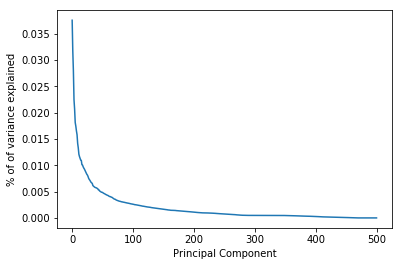

In [7]:
# 3.

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('% of of variance explained')
plt.show()

This plot of explained variance tells us that for lower values of the Principal Component, the explained variance is higher - that is to say, at those lower values the model is able to 

>**Ex. 7.2.1**: For each of the three character classes, compute the sentiment scores across wikipedia articles so that you can produce three histograms (one for each class) with sentiment scores. You can use the text strings you generated in the previous exercise. We will cheat a bit and use a library that does the scoring for us. Install `afinn` using `conda` or `pip` and extract the sentiment with that module. There's an example of how to use it on the library's [PyPi repository](https://pypi.python.org/pypi/afinn).

>**IMPORTANT**: `afinn`, for a piece of text, computes the sentiment of each word and then sums those sentiments. This can result in very large numbers as you may have experienced! To clarify, **you want the average** not the sum. Therefore, either compute the `afinn.score` for each word and take the average, or divide the score of a sentence by the number of words in it.

>**Ex. 8.2.1**: Modify the script from Ex. 8.1.1 so that it instead of word counts outputs the number of characters, words and lines in the file. Post as your answer in two seperate cells, (1) the code in the script in a code cell, and (2) the terminal output in a markdown cell with the text indented by one tab.

>**Ex. 8.2.4**: We can go even further! Let's add a third MapReduce step to count the number of triangles in a network. Again use this input data:

>        A B
>        A C
>        A D
>        B C
>        B D
>        B E
>        C D
>        C E
>        D E

>to validate that your implementation works. It should produce 7 triangles.

>1. Now compute the number of triangles in [this file](http://snap.stanford.edu/data/facebook_combined.txt.gz) which contains 88234 links in an anonymized facebook network. Don't print the whole output, just report the number you get.
>2. Do the same instead using all 2766607 road segments in California as your input. Go to [this site](https://www.cise.ufl.edu/research/sparse/matrices/SNAP/roadNet-CA.html) and download the data in Matrix Market format (`.mtx`). Unzip the file and remove the first 50 lines from it, since that is just markup that we don't need. The file is pretty big so you can expect it to take some time (~4 minutes on my computer). Report the number you get.

>*Hint: Counting triangles is equivalent to counting "common friends". One way to do that is to just count the collective number of common friends that exist in a network. Depending on your implementation you might want to correct your result by a factor 3, since it is likely that you end up counting each triangle three times (one for each point in it).*

>*Nerdy sidenote: Why would anyone want to count triangles??? Well, in network science there is a lot of statistical measures that include the count of triangles in a network. For example, the [clustering coefficient](https://en.wikipedia.org/wiki/Clustering_coefficient), which reveals how interconnected a network is, is computed as the number of realized triangles divided by the number of possible triangles.*

In [ ]:
from mrjob.job import MRJob
from mrjob.step import MRStep

class NumberOfTriangles(MRJob):

    # Step 1: map pair strings to 2-element lists and reduce
    def mapper1 (self, _, line):
        yield line.split()[0], line.split()[1]
        yield line.split()[1], line.split()[0]

    def reducer1 (self, key, values):
        yield key, list(values)

    # Step 2: map pairs to lists of mutual links and reduce
    def mapper2 (self, key, values):
        for value in list(values):
            pair = sorted([key,value])
            yield pair, values

    def reducer2 (self, key, values):
        set0 = set(values.next())
        set1 = set(values.next())
        common = list(set0.intersection(set1))
        yield key, common

    # Step 3: count the total number of triangles
    def mapper3 (self, key, values):
        yield None, len(list(values))

    def reducer3 (self, key, values):
        yield "Number of triangles: ", sum(values) / 3

    def steps (self):
        return [
            MRStep(
                mapper = self.mapper1,
                reducer = self.reducer1
            ),
            MRStep(
                mapper = self.mapper2,
                reducer = self.reducer2
            ),
            MRStep(
                mapper = self.mapper3,
                reducer = self.reducer3
            )
        ]

if __name__ == '__main__':
    NumberOfTriangles.run()


1. 1612010 triangles found.
2. 120676 triangles found.